In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# Softmax Regression

In [2]:
class SoftmaxRegression:
    
    def softmax(self, x):
        
        # shape(#samples, #classes)
        z = ((np.dot(x, self.weight)) + self.bias)
        
        # shape(#samples, #classes)
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T
        
    def forward(self, x):
        
        # shape(#samples, #classes)
        return self.softmax(x)
    
    def crossEntropy(self, y, y_hat):
        
        # shape(#samples, )
        return - np.sum(np.log(y_hat) * (y), axis=1)
    
    def cost(self, y, y_hat):
        
        # scalar
        return np.mean(self.crossEntropy(y, y_hat))
        
    def train(self, x, y, alpha, epoch, random_state=-1):
        
        # x : shape(#samples, #features)
        # y : shape(#samples, #classes)
        
        m, n, c = x.shape[0], x.shape[1], y.shape[1]
        
        if random_state != -1:
            np.random.seed(random_state)
        
        # shape(#features, #classes)
        self.weight = np.random.randn(n,c)

        # shape(1, #classes)
        self.bias = np.zeros((1,c))
        
        self.epoch = epoch
        
        self.cost_list = []
        
        for i in range(self.epoch):
            
            # shape(#samples, #classes)
            y_hat = self.forward(x)
    
            # scalar
            loss = self.cost(y, y_hat)

            self.cost_list.append(loss)

            # Gradient
            # dL_dw : dLoss/dweight (#features, #classes)
            dL_dw = (np.dot(x.T, (y_hat - y)))/m

            # dL_db : dLoss/dbias (1, #classes)
            dL_db = np.sum((y_hat - y)/m)

            # shape(#features, #classes)
            self.weight = self.weight - (alpha * dL_dw)

            # shape(1, #classes)
            self.bias = self.bias - (alpha * dL_db)
            
    def plot_convergence(self):
        
        plt.plot([i for i in range(self.epoch)], self.cost_list)
        plt.xlabel('Epochs'); plt.ylabel('Cross Entropy')
        
    def predict(self, x_test):
        
        # shape(#samples, #classes)
        y_hat = self.forward(x_test)
        return y_hat.argmax(axis=1)

## Utils

In [3]:
def train_test_split(x, y, size=0.2, random_state=-1):
    
    if random_state != -1:
        np.random.seed(random_state)
        
    x_val = x[:int(len(x)*size)]
    y_val = y[:int(len(x)*size)]
    x_train = x[int(len(x)*size):]
    y_train = y[int(len(x)*size):]
    
    return x_train, y_train, x_val, y_val

## Train

In [4]:
df = pd.read_csv('data/Iris.csv')
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


### Data Preparation

In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Convert to numerical

In [6]:
df.Species.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), (0, 1, 2), inplace=True)

#### Shuffle data

In [7]:
df = df.sample(frac=1, random_state=0)

#### Convert dataframe to numpy array

In [8]:
X, Y = df.drop(['Species'], axis=1).values, df.Species.values

#### Split

In [9]:
X_train, Y_train, X_val, Y_val = train_test_split(X, Y, size=0.2, random_state=0)
y_train = Y_train.copy()
Y_train = (np.arange(np.max(Y_train) + 1) == Y_train[:, None]).astype(float)

#### Train

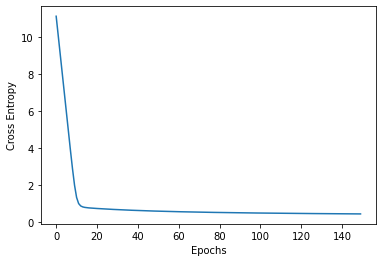

In [10]:
s = SoftmaxRegression()

s.train(X_train, Y_train, 0.02, 150, random_state=0)
s.plot_convergence()

## Evaluate on validation data

In [11]:
Y_hat = s.predict(X_val)

confusion_matrix(Y_val, Y_hat)

array([[11,  0,  0],
       [ 0, 10,  3],
       [ 0,  0,  6]])

In [12]:
print(classification_report(Y_val, Y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



# Train using sklearn

## Train

In [13]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Evaluate on validation data

In [14]:
Y_hat = lr.predict(X_val)

confusion_matrix(Y_val, Y_hat)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [15]:
print(classification_report(Y_val, Y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

